In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hist(areas, sample=1000, result=None):
  plt.hist(areas)
  plt.title('sample size = ' + str(sample))

  mean = np.mean(areas)
  std = np.std(areas)
  plt.axvline(mean, color='green', label='Found mean: {}'.format(round(mean,3)), linewidth=2)

  if result:
    plt.axvline(result, color='red', label='Analitic Value: {}'.format(round(result,3)), linestyle='dashed', linewidth=2)

  plt.legend()
  plt.show()

### Monte Carlos Integration

By ploting random points in a known area A that is at least as big as the maximum and minimum of the of a given function within the analized domain, we can estimate the area of the function as the percentile of the points that fell within the function multiplied by the area A used.

E.g *a circle of radius 1 from the origin, should give us a aproximate value of PI*

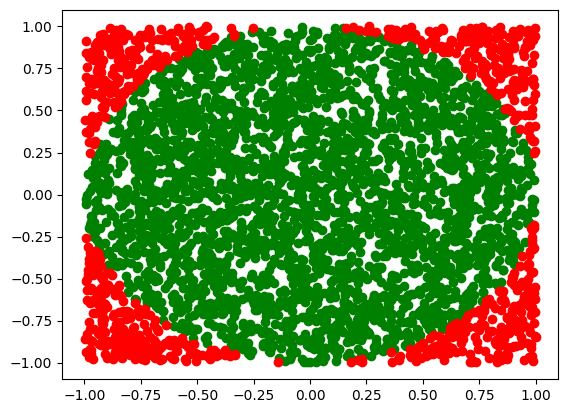

In [3]:
inside = []
outside = []
for _ in range(4000):
  x = np.random.random() * 2 - 1
  y = np.random.random() * 2 - 1
  if x**2 + y**2 <= 1:
    inside.append((x,y))
  else:
    outside.append((x,y))
plt.scatter(*zip(*inside), color='green')
plt.scatter(*zip(*outside), color='red')
plt.show()

In [4]:
area = 2*2
fraction = len(inside)/len(inside + outside)
print('Area of f(x) = x: ', area*fraction)

Area of f(x) = x:  3.143


### Metodo 1

First, we apply the above algorithm directly

In [5]:
def monte_carlo_1(f, start, end, fmax, sample = 10000):
  x = np.random.random(sample) * (end - start) + start
  y = np.random.random(sample) * fmax
  hits = y <= f(x)
  area = fmax * (end - start) * sum(hits)/sample
  return area

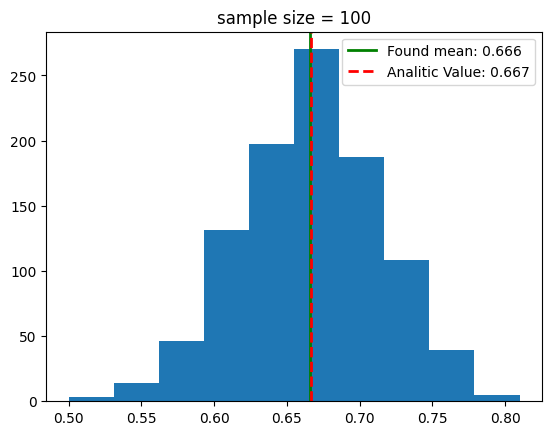

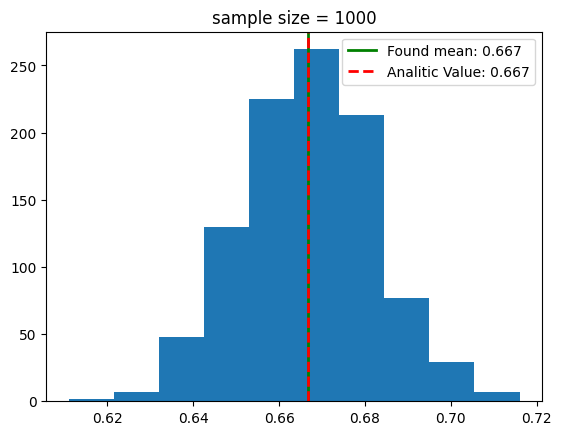

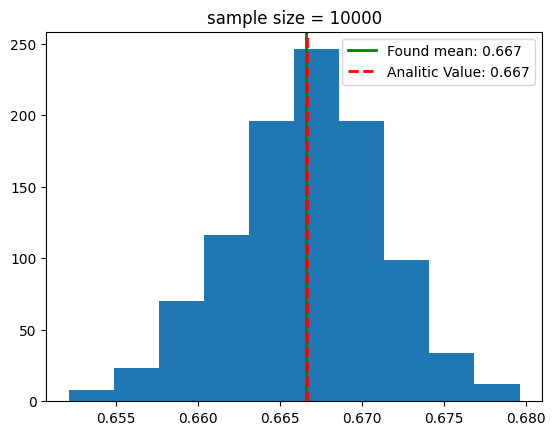

In [6]:
# 1-x**2 [0,1]
def f(x):
  return 1 - x**2

# Valor Analitico = 2/3
for s in [100,1000,10000]:
  A = []
  for i in range(1000):
    area = monte_carlo_1(f,0,1,1,sample=s)
    A.append(area)
  hist(A, sample=s, result=2/3)

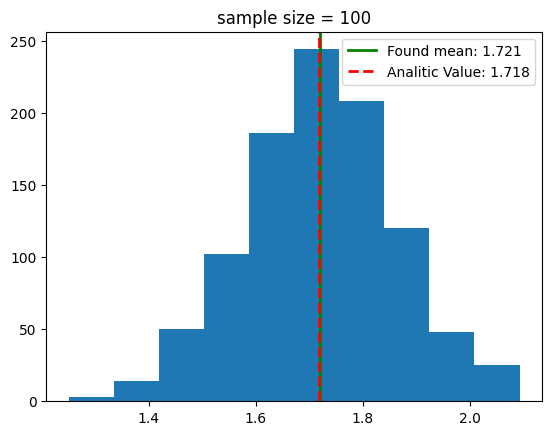

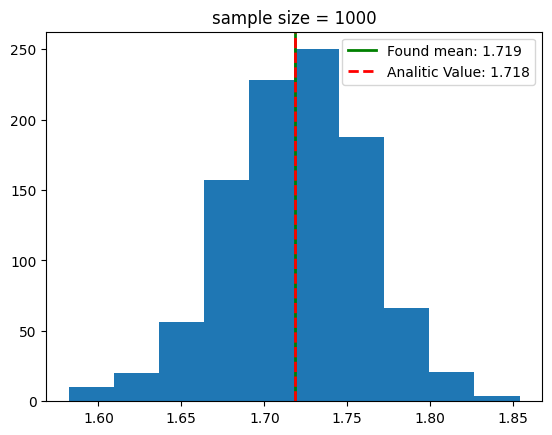

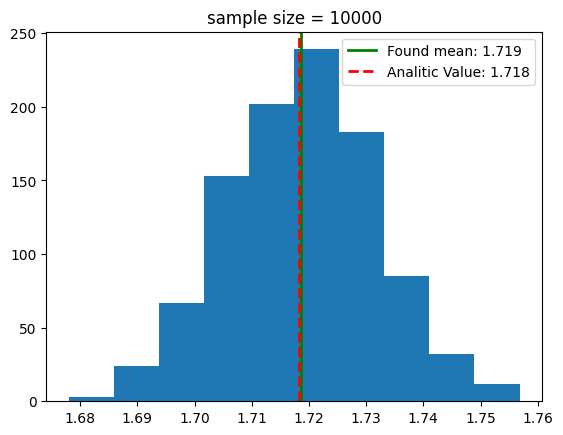

In [7]:
# e**x [0,1]
def f(x):
  return np.e ** x

# Valor Analitico = e - 1
for s in [100,1000,10000]:
  A = []
  for i in range(1000):
    area = monte_carlo_1(f,0,1,np.e,sample=s)
    A.append(area)
  hist(A, sample=s, result=np.e-1)

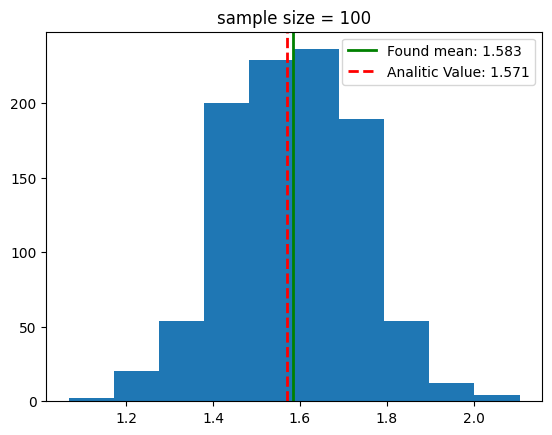

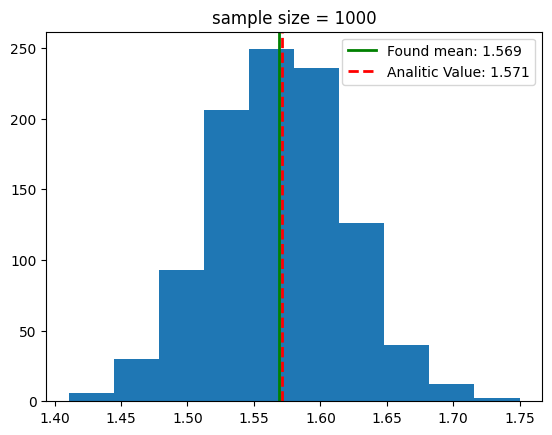

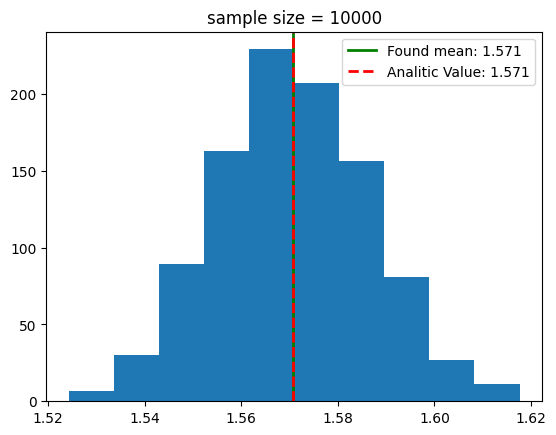

In [8]:
# sin(x)**2 [0,pi]
def f(x):
  return np.sin(x) ** 2

# Valor Analitico = np.pi / 2
for s in [100,1000,10000]:
  A = []
  for i in range(1000):
    area = monte_carlo_1(f,0,np.pi,1,sample=s)
    A.append(area)
  hist(A, sample=s,result=np.pi/2)


### Metode 2

The direct implementation is rather costly, so we will make a small optimization: lets assume A is already the area of the function, and from these points we calculate area A.

As we know, the average height of the points within the area, times its width, is its area, thus we can easily and performatively calculate this area from the points of the area.

In [9]:
def monte_carlo_2(f, start, end, sample = 10000):
  x = np.random.random(sample) * (end - start) + start
  median = f(x).sum()/sample
  area = (end - start) * median
  return area

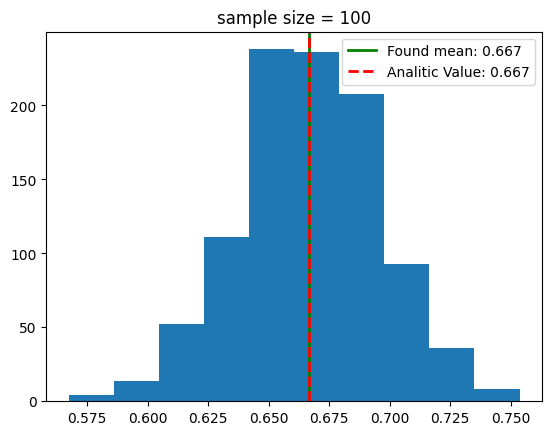

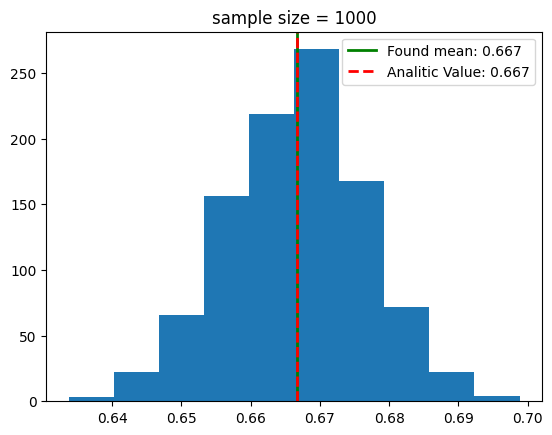

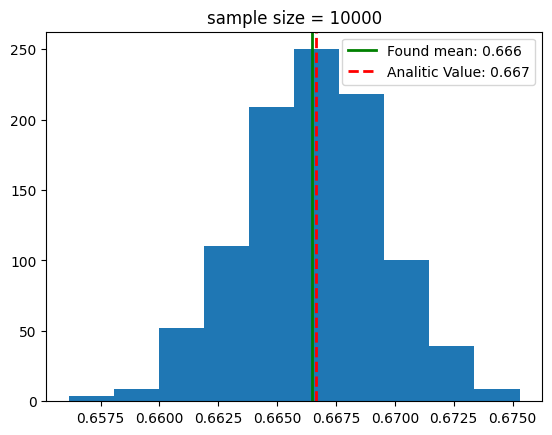

In [10]:
# 1-x**2 [0,1]
def f(x):
  return 1 - x**2

# Valor Analitico = 2/3
for s in [100,1000,10000]:
  A = []
  for i in range(1000):
    area = monte_carlo_2(f,0,1,sample=s)
    A.append(area)
  hist(A, sample=s, result=2/3)

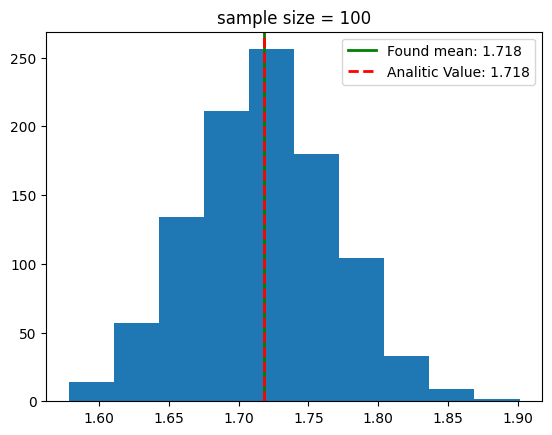

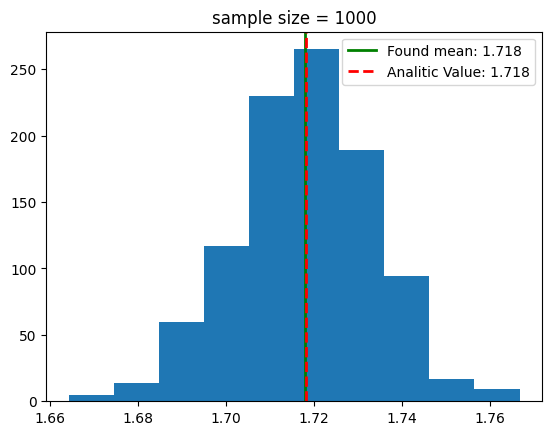

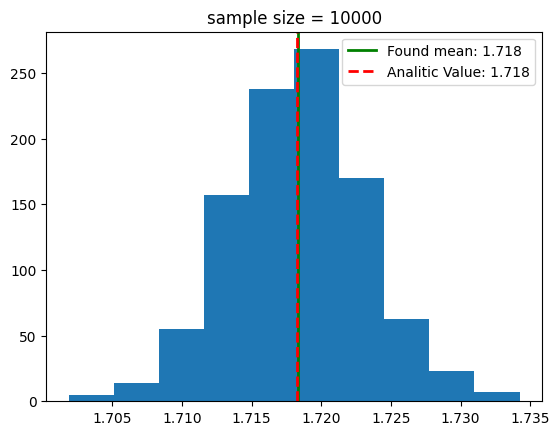

In [11]:
# e**x [0,1]
def f(x):
  return np.e ** x

# Valor Analitico = e - 1
for s in [100,1000,10000]:
  A = []
  for i in range(1000):
    area = monte_carlo_2(f,0,1,sample=s)
    A.append(area)
  hist(A, sample=s, result=np.e-1)

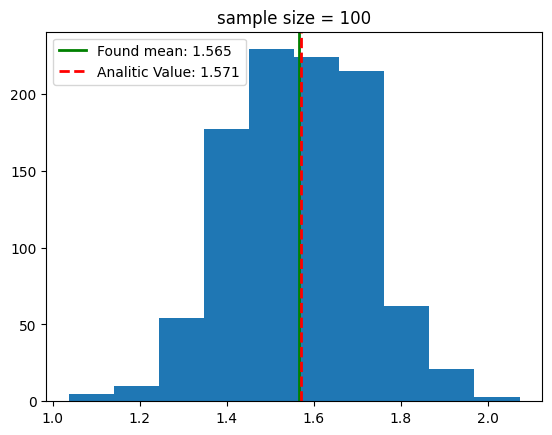

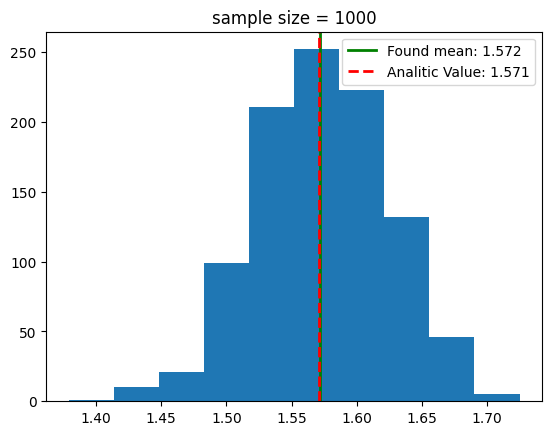

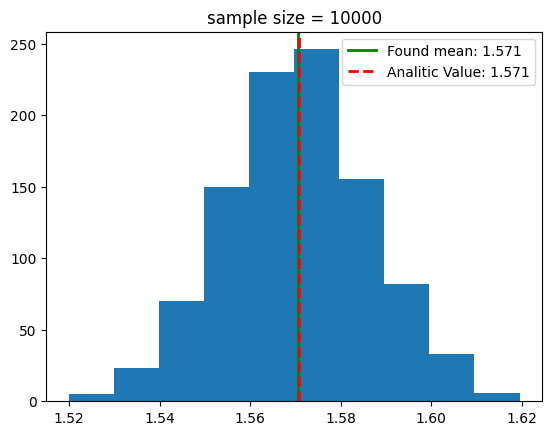

In [12]:
# sin(x)**2 [0,pi]
def f(x):
  return np.sin(x) ** 2

# Valor Analitico = np.pi / 2
for s in [100,1000,10000]:
  A = []
  for i in range(1000):
    area = monte_carlo_1(f,0,np.pi,1,sample=s)
    A.append(area)
  hist(A, sample=s,result=np.pi/2)

### 3D Interpretation

So far we only worked on the 2d plane with a single variable, but this method can be easily applied to any number of dimensions and variables. Since method 2 is more performative, we will use it in this example.

Here we will work with a function f that takes three 3d vectors as arguments, f(v1,v2,v3) or f(x1,x2,x3,y1,y2,y3,z1,z2,z3)

In [13]:
def monte_carlo_3(f, start, end, sample = 10000):
  x1 = np.random.random(sample) * (end - start) + start
  x2 = np.random.random(sample) * (end - start) + start
  x3 = np.random.random(sample) * (end - start) + start
  y1 = np.random.random(sample) * (end - start) + start
  y2 = np.random.random(sample) * (end - start) + start
  y3 = np.random.random(sample) * (end - start) + start
  z1 = np.random.random(sample) * (end - start) + start
  z2 = np.random.random(sample) * (end - start) + start
  z3 = np.random.random(sample) * (end - start) + start

  median = f(x1,x2,x3,y1,y2,y3,z1,z2,z3).sum()/sample
  area = (end - start) * median
  return area

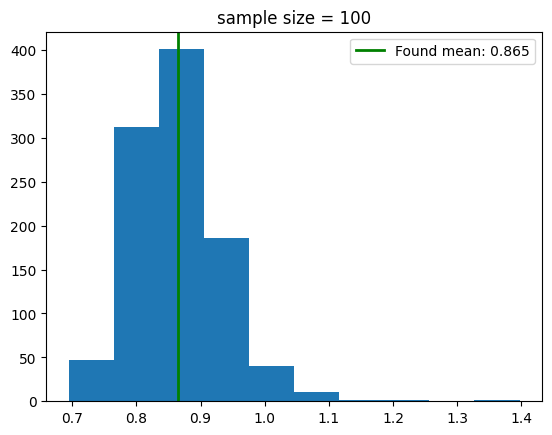

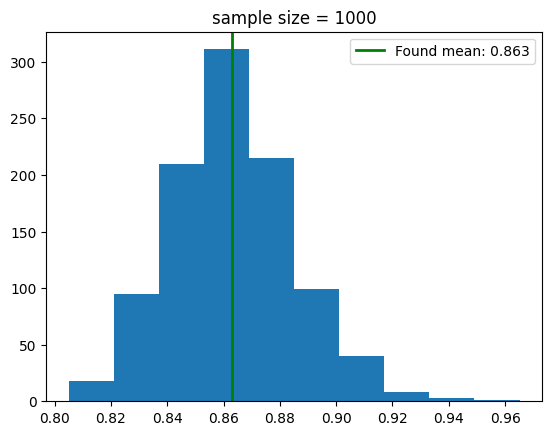

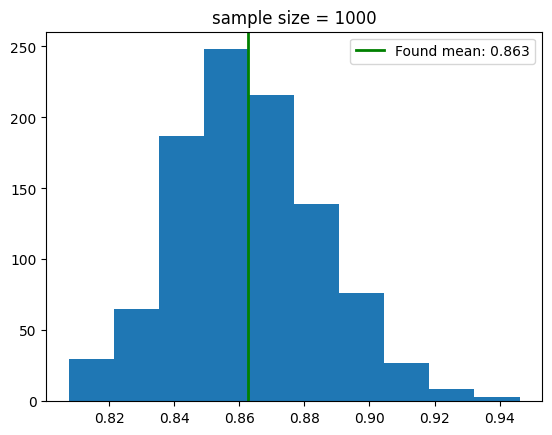

In [14]:
# 1 / ( (v1 + v2) dot v3 ), v = (x,y,z) for x,y,z = [0,1]
def f(x1,x2,x3,y1,y2,y3,z1,z2,z3):
  return 1 / ( (x1+x2)*x3 + (y1+y2)*y3 + (z1+z2)*z3 )

# Valor Analitico = 2/3
for s in [100,1000,1000]:
  A = []
  for i in range(1000):
    area = monte_carlo_3(f,0,1,sample=s)
    A.append(area)
  hist(A, sample=s)